<h1 align="center"> <span style="font-size: 20px;"> Proyecto Final Grupo Nº 7 </span> <br>
    <align="center"> <span style="font-size: 15px;">  Proyecto Yelp & Google Maps - Reviewa y Recomendaciones</span><br>         
<align="center"> <span style="font-size: 15px;">@utores:  Javier Castro, Luca Ramallo, Luis Ramírez, Lesmen García.</span> <br>
  <a href="https://github.com/lesmengp/Proyecto-Final-Grupo-07.git">GitHub: <span style="font-size: 20px;">Proyecto Yelp & Google Maps</span></a> 
</h1>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import json
import gcsfs
import ast
from textblob import TextBlob   #0.17.1
import pandas as pd
import folium
import webbrowser
import textwrap
from folium.plugins import MarkerCluster

In [2]:
Ubicacion = "gs://gmy/Datasets_ML/NuevosDatasetsML"
NombreDelArchivo = 'Consolidado_Businees_Review_Tip'
Extension = '.parquet'
file = os.path.join(Ubicacion, NombreDelArchivo) + Extension
# Lee el archivo Parquet directamente en un DataFrame de pandas
df_Consolidado_Businees_Review_Tip = pd.read_parquet(file, storage_options={"project": "Proyecto Final - Henry"})
df_Consolidado_Businees_Review_Tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44636 entries, 0 to 44635
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 44636 non-null  object 
 1   Total_UnaEstrella           44636 non-null  int64  
 2   Total_DosEstrellas          44636 non-null  int64  
 3   Total_TresEstrellas         44636 non-null  int64  
 4   Total_CuatroEstrellas       44636 non-null  int64  
 5   Total_CincoEstrellas        44636 non-null  int64  
 6   Total_Estrellas             44636 non-null  int64  
 7   Total_Sentimientos_Reviews  44636 non-null  int64  
 8   T_S_P_Review                44636 non-null  int64  
 9   T_S_Neutros_Review          44636 non-null  int64  
 10  T_S_N_Review                44636 non-null  int64  
 11  Total_useful                44636 non-null  int64  
 12  Total_funny                 44636 non-null  int64  
 13  Total_cool                  446

In [3]:
df_Consolidado_Businees_Review_Tip.head().T

,0,1,2,3,4
business_id,---kPU91CF4Lq2-WlRu9Lw,--8IbOsAAxjKRoYsBFL-PA,--MbOh2O1pATkXa7xbU6LA,--ZVrH2X2QXBFdCilbirsw,--a_r_w1HTsOY-fagPeNKg
Total_UnaEstrella,1,9,3,0,0
Total_DosEstrellas,0,3,2,0,0
Total_TresEstrellas,2,3,1,3,3
Total_CuatroEstrellas,4,5,8,4,5
Total_CincoEstrellas,17,7,13,29,2
Total_Estrellas,24,27,27,36,10
Total_Sentimientos_Reviews,24,27,27,36,10
T_S_P_Review,23,19,25,33,9
T_S_Neutros_Review,0,1,0,1,1


In [12]:
df = df_Consolidado_Businees_Review_Tip.sort_values('Total_Estrellas',ascending=False).copy()

In [15]:
df['name'].head(10)

26207                     Acme Oyster House
26910                          Oceana Grill
12235    Hattie B’s Hot Chicken - Nashville
43866               Reading Terminal Market
36417            Ruby Slipper - New Orleans
32470                   Mother's Restaurant
22533                           Royal House
25936                    Commander's Palace
12000                                  Luke
5439                                 Cochon
Name: name, dtype: object

In [7]:
# Se separan en 2 dataframe nuevos, las variables categoricas, solo para chequear.

df_categoricas_business = df_ML_promedios.select_dtypes(include=['object', 'category'])
df_numericas_business = df_ML_promedios.select_dtypes(include='number')

In [11]:
df_categoricas_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'hours', 'RestaurantsTakeOut', 'BusinessParking',
       'BusinessAcceptsCreditCards', 'RestaurantsDelivery',
       'RestaurantsPriceRange2', 'OutdoorSeating', 'BikeParking',
       'RestaurantsReservations', 'WiFi', 'HasTV', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

In [13]:
# Conteo de los niveles en las diferentes columnas categoricas para las que se tienen idea, por ejemplo: si es sexo deberia tener 2 categorias hombre o mujer (por ahora).
# si es estado civil puede haber soltero, casado, divorciado, otros, etc.
# Con esto podemos determinar si alguna tiene una sola cetegoria, entonces, esta columna no aportara nada.

# Si se desea en algunos datos categoricos que si tenemos idea de cuantas categorias deberia traer.
# columnas = ['adult', 'genres', 'original_language', 'spoken_languages', 'status', 'video']

columnas = ['RestaurantsTakeOut', 'BusinessParking', 'BusinessAcceptsCreditCards', 
            'RestaurantsDelivery', 'RestaurantsPriceRange2', 'OutdoorSeating', 
            'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV']

for col in columnas:
    print(f'Columna {col}: {len(df_categoricas_business[col].unique())} subniveles')

Columna RestaurantsTakeOut: 4 subniveles
Columna BusinessParking: 162 subniveles
Columna BusinessAcceptsCreditCards: 4 subniveles
Columna RestaurantsDelivery: 4 subniveles
Columna RestaurantsPriceRange2: 6 subniveles
Columna OutdoorSeating: 4 subniveles
Columna BikeParking: 4 subniveles
Columna RestaurantsReservations: 4 subniveles
Columna WiFi: 8 subniveles
Columna HasTV: 4 subniveles


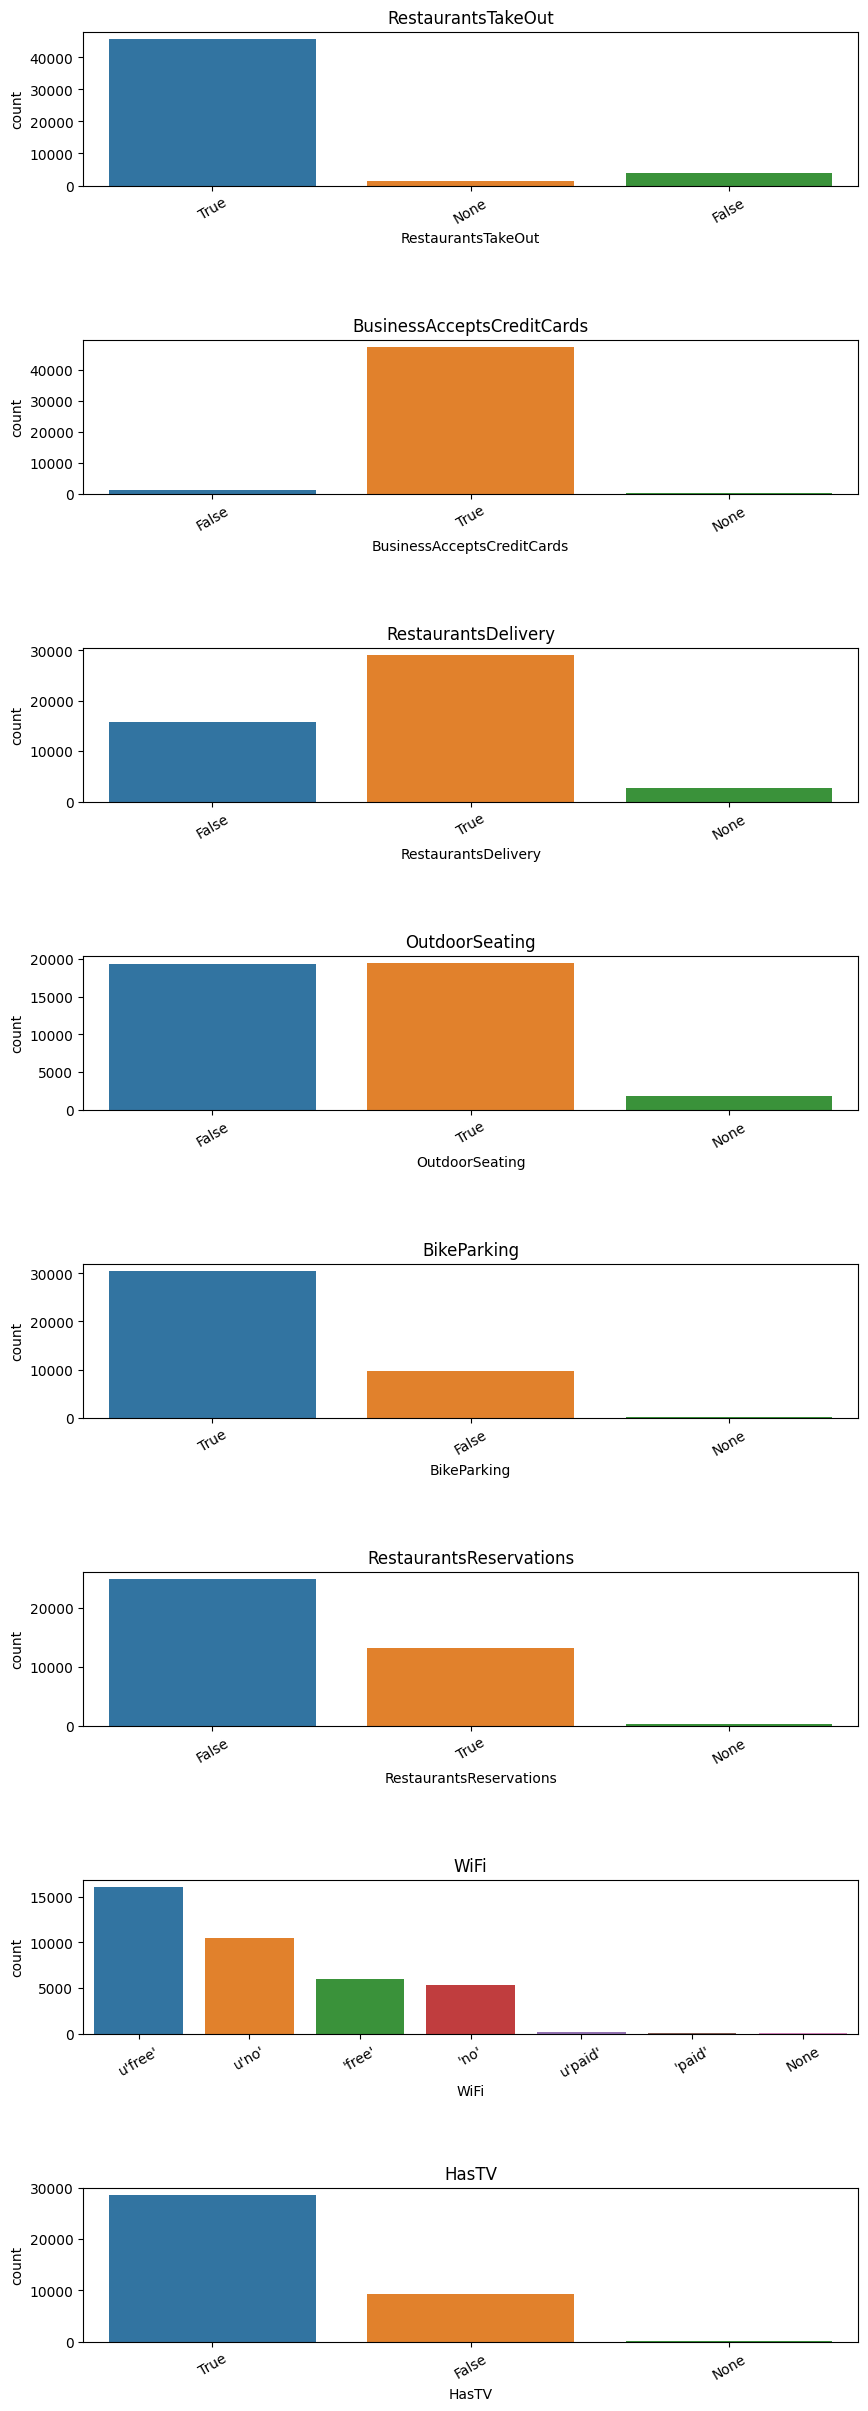

In [33]:
# Graficando algunos campos y sus categorias

columnas = ['RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 
            'OutdoorSeating', 'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV']

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columnas):
    sns.countplot(x=col, data=df_ML_promedios, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [34]:
# Se cambian para el grupo de columnas:
# Valores None, 'None' a false
columnas = ['RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 
            'OutdoorSeating', 'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV']

for col in columnas:
    df_ML_promedios[col].fillna(value='False', inplace=True)
    df_ML_promedios[col].replace({"None":'False'}, inplace=True)

In [35]:
# Se cambian para el grupo de columnas:
# "u'free'", "'free'", "'paid'", "u'paid'" -> 'True'
# None, 'None', "u'no'", "'no'"            -> 'False'
columnas = ['WiFi']

for col in columnas:
    #df_categoricas_business[col].fillna(value='False', inplace=True)
    df_ML_promedios[col].replace({"u'free'":'True'}, inplace=True)
    df_ML_promedios[col].replace({"'free'":'True'}, inplace=True)
    df_ML_promedios[col].replace({"'paid'":'True'}, inplace=True)
    df_ML_promedios[col].replace({"u'paid'":'True'}, inplace=True)
    df_ML_promedios[col].replace({"None":'False'}, inplace=True)
    df_ML_promedios[col].fillna(value='False', inplace=True)
    df_ML_promedios[col].replace({"u'no'":'False'}, inplace=True)
    df_ML_promedios[col].replace({"'no'":'False'}, inplace=True)    

In [36]:
# Se cambian las columnas:
# 'True' -> 1
# 'False' -> 0
columnas = ['RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 
            'OutdoorSeating', 'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV']
for col in columnas:
    df_ML_promedios[col].replace({"True":1}, inplace=True)
    df_ML_promedios[col].replace({"False":0}, inplace=True)

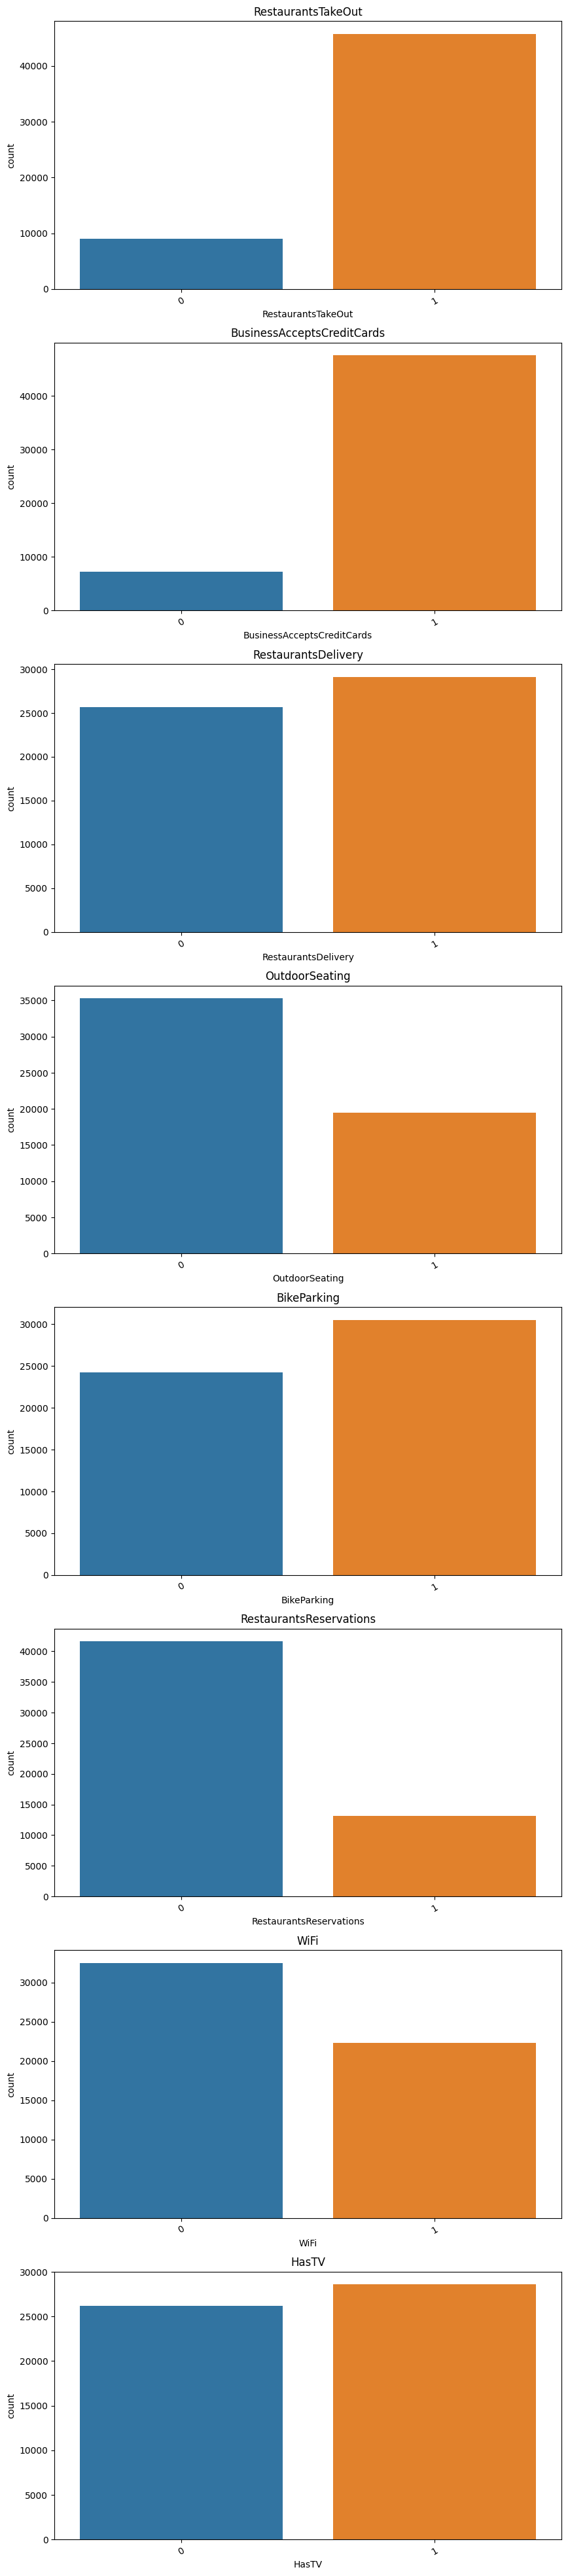

In [37]:
columnas = ['RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 
            'OutdoorSeating', 'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV']
ffig, ax = plt.subplots(nrows=8, ncols=1, figsize=(10,50))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columnas):
    sns.countplot(x=col, data=df_ML_promedios, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [38]:
df_ML_promedios.head(1).T

,0
business_id,MTSW4McQd7CbVtyjqoe9mw
name,St Honore Pastries
address,935 Race St
city,Philadelphia
state,CA
postal_code,19107
latitude,39.955505
longitude,-75.155564
stars,4.0
review_count,80


In [39]:
df_ML_promedios.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'hours',
       'RestaurantsTakeOut', 'BusinessParking', 'BusinessAcceptsCreditCards',
       'RestaurantsDelivery', 'RestaurantsPriceRange2', 'OutdoorSeating',
       'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'average_stars', 'total_sentimientos',
       'promedio_sentimientos_positivos', 'promedio_sentimientos_negativos',
       'Promedio_useful', 'Promedio_funny', 'Promedio_cool'],
      dtype='object')

In [42]:
# Se eliminan las columnas:
# hours
# BusinessParking
# RestaurantsPriceRange2
# Monday
# Tuesday
# Wednesday
# Thursday
# Friday
# Saturday
# Sunday
columnas_a_eliminar = ['hours', 'BusinessParking', 'RestaurantsPriceRange2', 
                       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                       'Friday', 'Saturday', 'Sunday']

df_ML_promedios.drop(columnas_a_eliminar,axis='columns', inplace=True)

In [43]:
df_ML_promedios.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'RestaurantsTakeOut', 'BusinessAcceptsCreditCards',
       'RestaurantsDelivery', 'OutdoorSeating', 'BikeParking',
       'RestaurantsReservations', 'WiFi', 'HasTV', 'average_stars',
       'total_sentimientos', 'promedio_sentimientos_positivos',
       'promedio_sentimientos_negativos', 'Promedio_useful', 'Promedio_funny',
       'Promedio_cool'],
      dtype='object')

In [3]:
# Se salva el dataframe con un archivo en formato parquet
Ubicacion = "gs://gmy/Datasets_ML"
NombreDelArchivo = 'df_ML_promedios_final'
Extension = '.csv'
file = os.path.join(Ubicacion, NombreDelArchivo) + Extension
df_ML_promedios.to_csv(file)

NameError: name 'df_ML_promedios' is not defined